In [1]:
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('/kaggle/input/house-price-prediction-dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# do one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, dtype = int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [6]:
df_encoded.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.141284,0.858716,0.822018,0.177982,...,0.350459,0.954128,0.045872,0.684404,0.315596,0.765138,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.348635,0.382849,0.382849,...,0.477552,0.209399,0.209399,0.465180,0.465180,0.424302,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# make sure to save the encoded DataFrame
df_encoded.to_csv('df_encoded.csv',index=False)

In [ ]:
# find the correlation between features
corr = df_encoded.corr()

In [9]:
# corr

In [ ]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

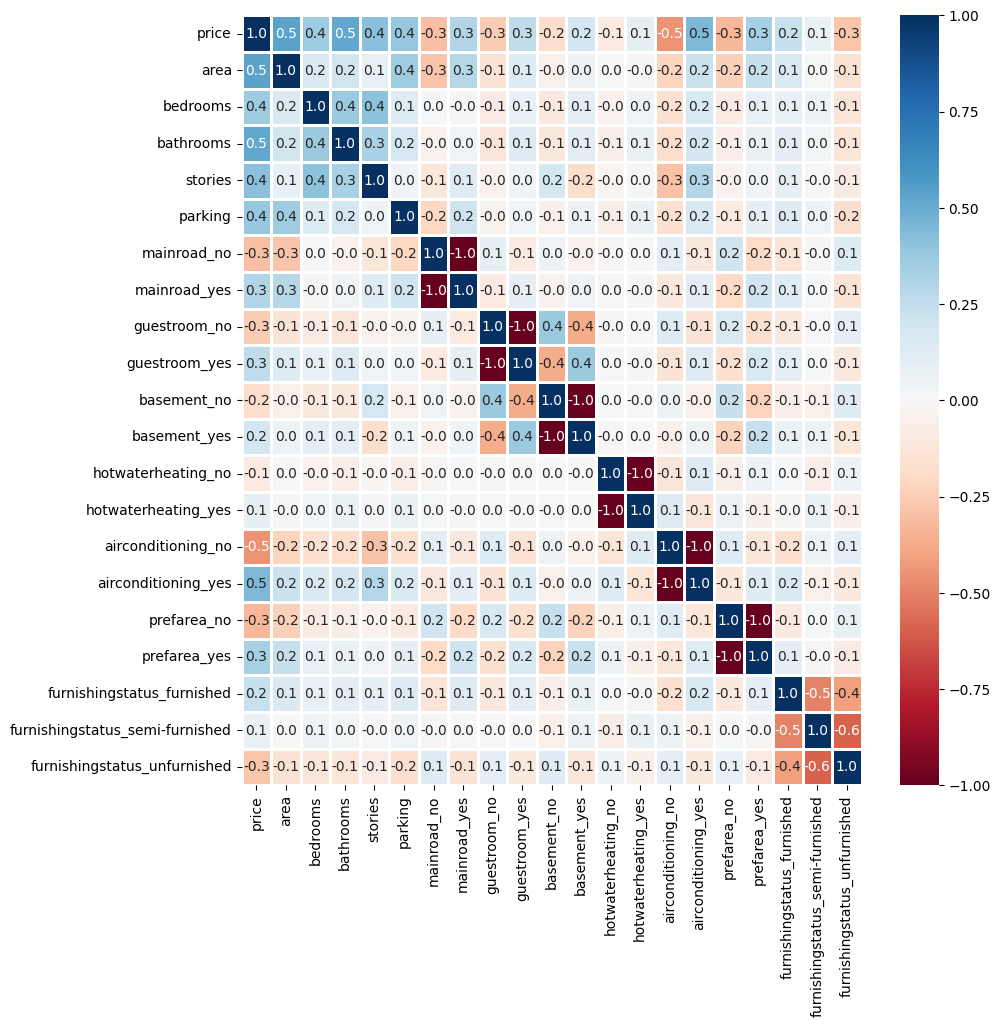

In [ ]:
# heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1f',linewidths=1,cmap='RdBu')

In [ ]:
# y for target variable, and X for features
y = df_encoded['price']
X = df_encoded.drop('price',axis=1)

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent data set.
# https://www.geeksforgeeks.org/machine-learning/cross-validation-machine-learning/?/
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=5,)

In [ ]:
# Proportion of training data to the entire dataset
len(X_train)/len(df_encoded)

0.8

In [ ]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Evaluate the model on the test set
model.score(X_test,y_test)

0.6637623178549077

In [ ]:
# Predicting the price of a house with specific features
model.predict([[7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8141625.04006791])

In [ ]:
# Coefficients of the model
model.coef_ # m1, m2, ...

array([ 2.53313759e+02,  8.50898961e+04,  1.01524676e+06,  4.25746608e+05,
        3.04584359e+05, -1.55951893e+05,  1.55951893e+05, -1.47007216e+05,
        1.47007216e+05, -1.95095262e+05,  1.95095262e+05, -4.46959255e+05,
        4.46959255e+05, -4.57251071e+05,  4.57251071e+05, -3.20381177e+05,
        3.20381177e+05,  1.28862186e+05,  9.44460723e+04, -2.23308258e+05])

In [ ]:
# Intercept of the model
model.intercept_ # c

1731390.715796697

In [23]:
# y = m1x1 + m2x2 + ... + c

In [ ]:
# Save the model using joblib
import joblib

In [ ]:
# Save the model to a file
joblib.dump(model,'lr_house_predication_model.joblib')

['lr_house_predication_model.joblib']

In [ ]:
# Load the model from the file
old_model = joblib.load('lr_house_predication_model.joblib')

In [ ]:
# verify the loaded model
old_model.score(X_test,y_test)

0.6637623178549077

In [28]:
1

1